<hr style="border:2px solid black">

### Project Milestone 1


[**Course material 2.1**](https://spiced.space/naive-bayleaves/ds-course/chapters/project_titanic/ml_fundamentals/README.html)

Download the data and do the exploratory data analysis as described in Project Milestone 1.

**Note:** train.csv in 2.1 is actually your full data set for the week. You need to split it to **train and validation**.

### Get the data

In [143]:
# data analysis stack
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import train-test-split
from sklearn.model_selection import train_test_split
from matplotlib import pyplot


In [144]:
full_data = pd.read_csv("data/titanic/train.csv")#working with this one only that is why full


test_for_kaggle = pd.read_csv("data/titanic/test.csv") #cannot touch only use when submitting to Kaggle

In [145]:
full_data.shape

(891, 12)

In [146]:
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploratory data analysis

Merge your X_train and y_train from the previous step into train_data

In [147]:
df_train = Xtrain
df_train['Survived'] =ytrain # add new column with survived resutls as ytrain
df_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
692,693,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S,1
481,482,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S,0
527,528,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,0
855,856,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S,1
801,802,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
359,360,3,"Mockler, Miss. Helen Mary ""Ellie""",female,NaN,0,0,330980,7.8792,NaN,Q,1
258,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1
736,737,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S,0
462,463,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,E63,S,0


**STEP 2** Calculate the number of surviving/non-surviving passengers and display it as a bar plot.

In [148]:
df_train.value_counts('Survived') # count all survivors

Survived
0    439
1    273
dtype: int64

<Axes: xlabel='Survived'>

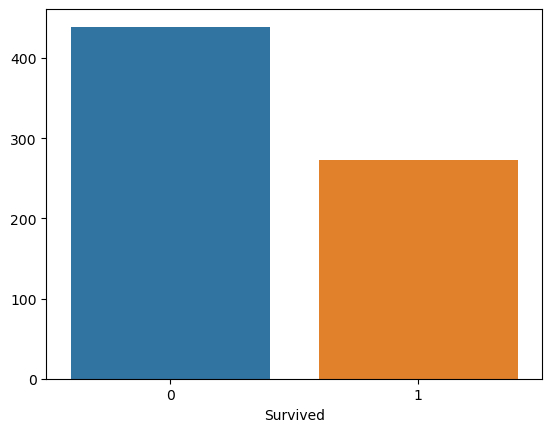

In [149]:
sns.barplot(data = df_train, x = 'Survived', y =df_train.value_counts('Survived'))

**STEP 3**
Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

In [150]:
df_train[df_train['Pclass'] == 1].value_counts('Survived',normalize=True)

Survived
1    0.649123
0    0.350877
dtype: float64

**STEP 4** Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.


<Axes: xlabel='Pclass'>

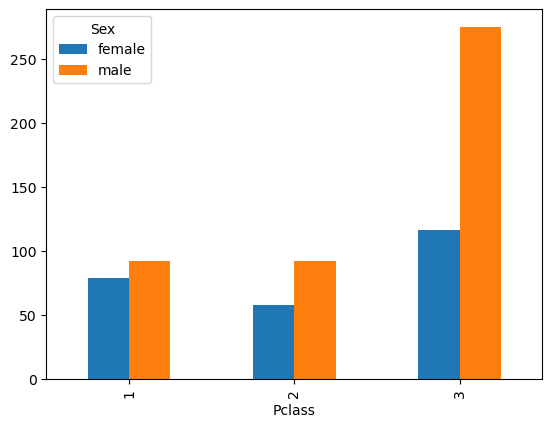

In [151]:
gender_vs_class = df_train.groupby(['Sex', 'Pclass']).size().reset_index(name='counts')
gender_vs_class.pivot(index='Pclass', columns='Sex', values='counts').plot.bar()

**STEP 5** Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

<Axes: xlabel='Age', ylabel='Count'>

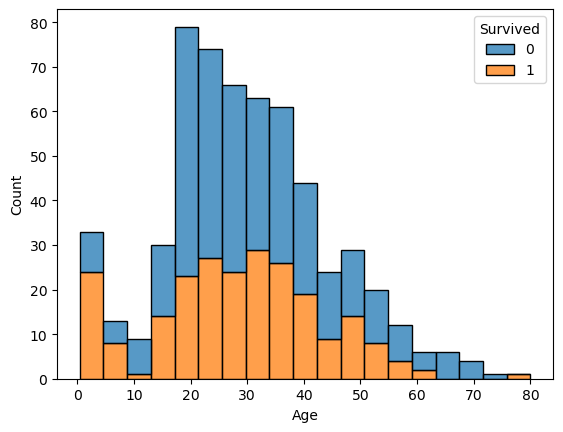

In [152]:
sns.histplot(data=df_train,
             x= 'Age',
             multiple='stack',
             hue = 'Survived'
            )


**STEP 6** Calculate the average age for survived and drowned passengers separately.


In [153]:
df_train.groupby('Survived')['Age'].mean()

Survived
0    30.814327
1    28.330129
Name: Age, dtype: float64

**Step 7** Replace missing age values by the mean age.

In [177]:
#check:
df_train['Age'].isna().sum()
mean_age = df_train['Age'].mean()
df_train['Age'] = df_train.groupby('Pclass').transform(lambda x: x.fillna(df_train['Age'].mean()))

ValueError: Columns must be same length as key

In [140]:
mean_age = df_train['Age'].mean()
df_train['Age'] = df_train['Age'].fillna(value = mean_age)

#check:
df_train['Age'].isna().sum()

0

**STEP 8**
Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.


In [131]:
pd.DataFrame(df_train.groupby(['Pclass']).value_counts(['Survived']))

0
Pclass Survived     
1      1          99
       0          64
2      0          78
       1          73
3      0         302
       1          96

### Train-Validation split
Use the train_test_split function()
+ Xtrain, Xval, ytrain, yval = ...

In [7]:
X = full_data.drop('Survived', axis=1)
y = full_data['Survived']

In [141]:
Xtrain, Xtest, ytrain, ytest = \
train_test_split(X, y, test_size=0.2,random_state=42, stratify =y)

In [142]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((712, 11), (179, 11), (712,), (179,))